<a href="https://colab.research.google.com/github/JungYeonHee/MachineLearning/blob/master/7%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EB%8B%88_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7주차 미니 과제 개요

SVM 과 그레디언트 부스팅 모델 테스트 해보기

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

데이터 세트 플로팅 함수

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Q1: 사이킷런 samples_generator 서브 패키지를 참고하여 도넛 모형의 비선형 분류 예제를 생성하자.

스펙
- 1000개 생성
- factor=0.1
- noise=0.1

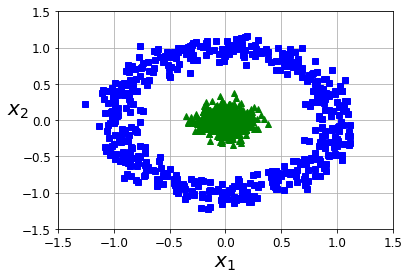

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(1000, factor=0.1, noise=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])
plt.show()

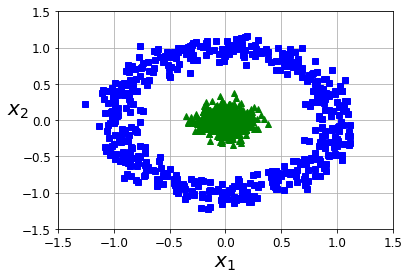

In [ ]:
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

SVM 결정경계 플로팅 함수

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, levels=[-1, 0, 1],  cmap=plt.cm.brg, alpha=0.1)

#Q2: SVC를 임포트 하고 선형 분류기 ``linear_clf`` 를 만들어보자

스펙
- kernel='linear'
- C=1e3

In [ ]:
from sklearn.svm import SVC

In [ ]:
linear_clf = SVC(kernel='linear', C=1e3)

linear_clf.fit(X, y)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

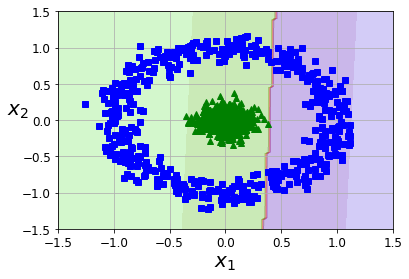

In [ ]:
plot_predictions(linear_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

# Q2a: C 값을 다양하게 설정해가며 결과를 관찰 및 정리해보자.

---------------

#Q3: RBF 커널을 사용하는 svm 분류기 `rbf_clf`를  학습해보자

스펙
- kernel='rbf'
- C=1e6

In [ ]:
rbf_clf = SVC(kernel='rbf', C=1e6)

rbf_clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

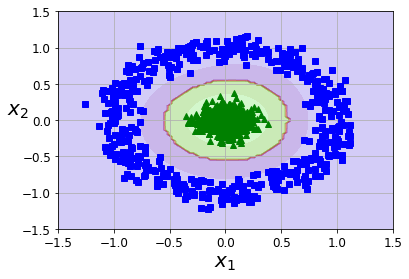

In [ ]:
plot_predictions(rbf_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q4: ``plot_predictions``를 수정하여 ``plot_predictions_with_sv`` 함수를 작성하자.

스펙
- 서포트 벡터를 찍어 보자.

In [ ]:
svm_reg = SVC(kernel='rbf', C=1e6)
svm_reg.fit(X, y)

def plot_predictions_with_sv(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    svs = svm_reg.support_vectors_ # svm_clf.support_vectors_ 로부터  x0,x1  좌표를 얻어내어 그리면 됨
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')



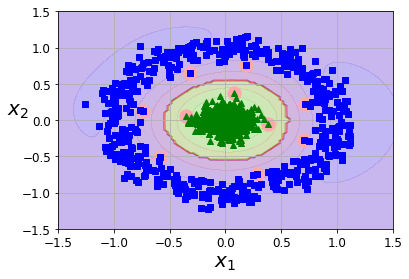

In [ ]:
plot_predictions_with_sv(svm_reg, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q4a: 하이퍼파라미터를 달리해가며 결과를 관찰해보자.

---------------

lightgbm 인스톨

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

#Q5: 그레디언트 부스팅 모델 lightgbm 학습기 ``gbm_clf`` 를 만들고 결정 경계를 그려보자

스펙
- max_depth=2

In [ ]:
gbm_clf = LGBMClassifier(max_depth=2)

gbm_clf.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
def plot_predictions_gbm(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


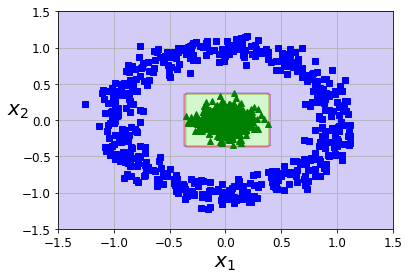

In [ ]:
plot_predictions_gbm(gbm_clf, [-1.5, 1.5, -1.5, 1.5])
plot_dataset(X, y, [-1.5, 1.5, -1.5, 1.5])

#Q5a: 하이퍼퍼라미터를 달라해가면 결과를 관찰해 보자.

# Q5b: 랜덤포레스트 모델로도 학습, 결정 경계를 그려보자

스펙
- 몇가지 하이퍼파라미터를 달리해가며 경향을 파악해보자.